In [1]:
import cv2
import csv
import pytesseract

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
file = r'/home/adrien/Repositories/Cezam/ocr-test/pdf_examples/compte joint_BANQUE POP_012017_bis/0000.jpg'
img = cv2.imread(file)
img.shape

(9353, 6613, 3)

In [3]:
img_bin = 255 - img
cv2.imwrite('/home/adrien/Repositories/Cezam/ocr-test/pdf_examples/inverted.jpg', img_bin)

True

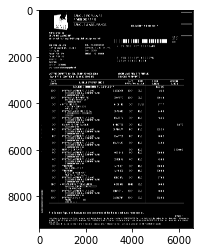

In [4]:
plotting = plt.imshow(img_bin, cmap='gray')
plt.show()

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 150, apertureSize=3)

In [6]:
min_len = edges.shape[1] * 0.75
max_gap = 6
lines = cv2.HoughLinesP(edges, rho=1, theta=(np.pi / 180), threshold=50, minLineLength=min_len, maxLineGap=max_gap)

In [7]:
def is_vertical(line):
    return line[0] == line[2]

def is_horizontal(line):
    return line[1] == line[3]

In [8]:
v_lines = []
h_lines = []
for i in range(len(lines)):
    l = lines[i][0]
    
    if is_vertical(l):
        v_lines.append(l)
    elif is_horizontal(l):
        h_lines.append(l)
print('V lines ({}): {}'.format(len(v_lines), v_lines))
print('H lines ({}): {}'.format(len(h_lines), h_lines))

V lines (12): [array([6220, 8285, 6220, 2979], dtype=int32), array([4174, 8279, 4174, 3234], dtype=int32), array([4166, 8280, 4166, 3235], dtype=int32), array([ 833, 8280,  833, 3235], dtype=int32), array([5400, 8279, 5400, 3238], dtype=int32), array([5392, 8281, 5392, 3234], dtype=int32), array([ 415, 8279,  415, 2981], dtype=int32), array([ 423, 8280,  423, 3235], dtype=int32), array([4583, 8280, 4583, 3235], dtype=int32), array([3700, 8280, 3700, 3235], dtype=int32), array([4575, 8280, 4575, 3234], dtype=int32), array([ 825, 8279,  825, 3234], dtype=int32)]
H lines (2): [array([ 417, 2978, 6219, 2978], dtype=int32), array([ 420, 8289, 6219, 8289], dtype=int32)]


In [9]:
def overlapping_filter(lines, sort_idx):
    filtered = []
    
    lines = sorted(lines, key=lambda lines: lines[sort_idx])
    threshold = 10
    
    for i in range(len(lines)):
        l = lines[i]
        if i > 0:
            l_prev = lines[i-1]
            if l[sort_idx] - l_prev[sort_idx] > threshold:
                filtered.append(l)
        else:
            filtered.append(l)
    return filtered

In [10]:
v_lines = overlapping_filter(v_lines, 0)
h_lines = overlapping_filter(h_lines, 1)
print('V lines ({}): {}'.format(len(v_lines), v_lines))
print('H lines ({}): {}'.format(len(h_lines), h_lines))

V lines (7): [array([ 415, 8279,  415, 2981], dtype=int32), array([ 825, 8279,  825, 3234], dtype=int32), array([3700, 8280, 3700, 3235], dtype=int32), array([4166, 8280, 4166, 3235], dtype=int32), array([4575, 8280, 4575, 3234], dtype=int32), array([5392, 8281, 5392, 3234], dtype=int32), array([6220, 8285, 6220, 2979], dtype=int32)]
H lines (2): [array([ 417, 2978, 6219, 2978], dtype=int32), array([ 420, 8289, 6219, 8289], dtype=int32)]


In [11]:
for line in v_lines:
    print(line)
    cv2.line(img, (line[0], line[1]), (line[2], line[3]), (0, 255, 0), 5)
for line in h_lines:
    print(line)
    cv2.line(img, (line[0], line[1]), (line[2], line[3]), (0, 255, 0), 5)

[ 415 8279  415 2981]
[ 825 8279  825 3234]
[3700 8280 3700 3235]
[4166 8280 4166 3235]
[4575 8280 4575 3234]
[5392 8281 5392 3234]
[6220 8285 6220 2979]
[ 417 2978 6219 2978]
[ 420 8289 6219 8289]


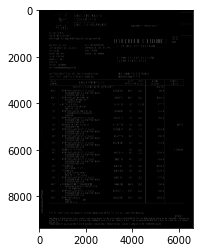

In [12]:
cv2.imwrite('/home/adrien/Repositories/Cezam/ocr-test/pdf_examples/edges.jpg', edges)
plotting = plt.imshow(edges, cmap='gray')
plt.show()

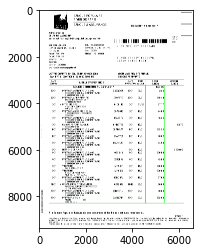

In [13]:
cv2.imwrite('/home/adrien/Repositories/Cezam/ocr-test/pdf_examples/img_bb.jpg', img)
plotting = plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
top = h_lines[0][1]
bot = h_lines[-1][1]